In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import backend as K



In [4]:
# VGG16 모델을 사용하여 이미지의 특징을 추출
# AutoEncoder를 훈련시켜 딥러닝 기반 클러스터링을 수행

In [5]:
def load_image(image_path):
    image = Image.open(image_path)
    return np.array(image)

In [6]:
def load_images_from_folder(folder):
    images = []
    allowed_extensions = {'png', 'jpg', 'jpeg', 'gif'}  # 허용되는 이미지 확장자 목록 추가

    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)

        # 파일이 이미지 파일인지 확인
        if not filename.lower().endswith(tuple(allowed_extensions)):
            continue

        try:
            img = load_img(file_path, target_size=(224, 224))
            img_array = img_to_array(img)
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")

    return np.array(images)

def build_autoencoder(input_shape, encoding_dim):
    input_img = Input(shape=input_shape)
    flat_img = Flatten()(input_img)
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    decoded = Dense(np.prod(input_shape), activation='sigmoid')(encoded)
    decoded = Reshape(input_shape)(decoded)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    return autoencoder, encoder

def feature_extraction(images, base_model):
    features = base_model.predict(preprocess_input(images))
    features = features.reshape((len(features), -1))
    return features

# def image_clustering_deep_learning(image_folder, encoding_dim, n_clusters):
#     # Load images from the specified folder
#     images = load_images_from_folder(image_folder)


In [12]:
##예시 진행
images = load_images_from_folder('C:/Users/LWG/Desktop/2023/코딩/EDA/Study/test/여자배우/배두나')

In [13]:
base_model =VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 [==============================] - 6s 0us/step


In [14]:
features = feature_extraction(images, base_model)

30/30 [==============================] - 68s 2s/step


In [15]:
input_shape = features.shape[1:]
autoencoder, encoder = build_autoencoder(input_shape,encoding_dim=32)
autoencoder.fit(features, features, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 1s 131ms/step - loss: 85.0897 - val_loss: 91.1534
Epoch 2/50
3/3 [==============================] - 0s 76ms/step - loss: 84.3139 - val_loss: 90.6458
Epoch 3/50
3/3 [==============================] - 0s 77ms/step - loss: 84.0270 - val_loss: 90.5974
Epoch 4/50
3/3 [==============================] - 0s 76ms/step - loss: 84.0053 - val_loss: 90.5938
Epoch 5/50
3/3 [==============================] - 0s 78ms/step - loss: 84.0008 - val_loss: 90.5926
Epoch 6/50
3/3 [==============================] - 0s 77ms/step - loss: 83.9978 - val_loss: 90.5918
Epoch 7/50
3/3 [==============================] - 0s 79ms/step - loss: 83.9932 - val_loss: 90.5891
Epoch 8/50
3/3 [==============================] - 0s 75ms/step - loss: 83.9883 - val_loss: 90.5857
Epoch 9/50
3/3 [==============================] - 0s 76ms/step - loss: 83.9829 - val_loss: 90.5837
Epoch 10/50
3/3 [==============================] - 0s 75ms/step - loss: 83.9772 - val_loss: 90.5802
Epoch 11

In [16]:
encoded_features = encoder.predict(features)

30/30 [==============================] - 0s 2ms/step


In [17]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(encoded_features)
labels = kmeans.labels_

C:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


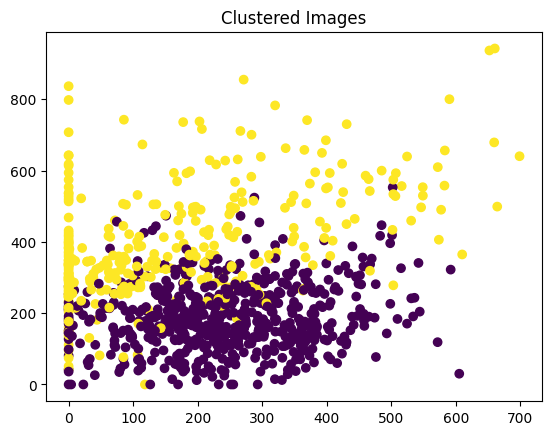

In [18]:
plt.scatter(encoded_features[:, 0], encoded_features[:, 1], c=labels, cmap='viridis')
plt.title('Clustered Images')
plt.show()